In [71]:
##Importamos librerias 

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import seaborn as sns
import scipy.stats as stats
import matplotlib as plt
pd.set_option("display.max_columns", None)

In [46]:
df = pd.read_csv("CSV/data_limpia_1.csv", index_col=0)

df.head()

,attrition,businesstravel,department,educationfield,gender,jobrole,overtime,remotework,age,distancefromhome,education,employeenumber,environmentsatisfaction,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,salary
0,no,non travel,unknown,unknown,M,research director,no,yes,51,6,3,1,1,3,5,3,16280.83,42330.17,7,13,3,3,0,5,3,20,15,15,195370.00
1,no,non travel,unknown,life sciences,M,manager,NaN,yes,52,1,4,2,1,2,5,3,16665.83,43331.17,0,14,3,1,1,5,3,33,11,9,199990.00
2,no,travel rarely,research & development,technical degree,M,manager,no,yes,42,4,2,3,1,3,5,4,16026.67,41669.33,1,11,3,4,0,3,3,22,11,15,192320.00
3,no,travel rarely,unknown,medical,F,research director,NaN,no,47,2,4,4,1,3,4,3,14307.50,37199.50,3,19,3,2,2,2,3,20,5,6,171690.00
4,no,non travel,unknown,technical degree,F,sales executive,no,no,46,3,3,5,1,4,4,1,12783.92,33238.20,2,12,3,4,1,5,3,19,2,8,153407.04


In [47]:
df.shape


(1614, 29)

## Exploración por columnas: 

Hipótesis: "Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. Se sospecha que los empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empresa".

In [48]:
#Dividimos a los empleados según nivel de satisfacción: 
grupo_a= df[df['jobsatisfaction'] >= 3]
grupo_b = df[df['jobsatisfaction'] < 3]

In [49]:
grupo_a.head()

,attrition,businesstravel,department,educationfield,gender,jobrole,overtime,remotework,age,distancefromhome,education,employeenumber,environmentsatisfaction,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,salary
0,no,non travel,unknown,unknown,M,research director,no,yes,51,6,3,1,1,3,5,3,16280.83,42330.17,7,13,3,3,0,5,3,20,15,15,195370.00
1,no,non travel,unknown,life sciences,M,manager,NaN,yes,52,1,4,2,1,2,5,3,16665.83,43331.17,0,14,3,1,1,5,3,33,11,9,199990.00
2,no,travel rarely,research & development,technical degree,M,manager,no,yes,42,4,2,3,1,3,5,4,16026.67,41669.33,1,11,3,4,0,3,3,22,11,15,192320.00
3,no,travel rarely,unknown,medical,F,research director,NaN,no,47,2,4,4,1,3,4,3,14307.50,37199.50,3,19,3,2,2,2,3,20,5,6,171690.00
5,no,non travel,research & development,medical,F,manager,no,yes,48,22,3,6,1,3,4,4,14311.67,37210.33,3,11,3,2,1,3,3,22,4,7,171740.04


In [50]:
grupo_a["attrition"].value_counts()

attrition
no     859
yes    136
Name: count, dtype: int64

In [51]:
## 1: Chequeamos tasa de abandono de ambos grupos: 

abandono_grupo_a = {"grupo": ["Abandono","Empleados actuales"], "valores": [136,859]}
df_abandono_grupo_a = pd.DataFrame(abandono_grupo_a)
df_abandono_grupo_a

,grupo,valores
0,Abandono,136
1,Empleados actuales,859


In [52]:
grupo_b['attrition'].value_counts()

attrition
no     496
yes    123
Name: count, dtype: int64

In [53]:
abandono_grupo_b = {"grupo": ["Abandono","Empleados actuales"], "valores": [123,496]}
df_abandono_grupo_b = pd.DataFrame(abandono_grupo_b)
df_abandono_grupo_b

,grupo,valores
0,Abandono,123
1,Empleados actuales,496


In [54]:
# Cálculo de la tasa de rotación

# Tasa de attrition en grupo A
df_grupoa_attrition = grupo_a[grupo_a["attrition"] == "yes"]
tasa_attrition_grupoa = round(df_grupoa_attrition.shape[0] / grupo_a.shape[0],2)
print(f"la tasa de attrition del grupo A es: {tasa_attrition_grupoa}")

# Tasa de attrition en grupo B
df_grupob_attrition = grupo_b[grupo_b["attrition"] == "yes"]
tasa_attrition_grupob = round(df_grupob_attrition.shape[0] / grupo_b.shape[0],2)
print(f"la tasa de attrition del grupo B es: {tasa_attrition_grupob}")

la tasa de attrition del grupo A es: 0.14
la tasa de attrition del grupo B es: 0.2


In [55]:
##    3. Realiza un análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos A y B. 

<Axes: xlabel='grupo', ylabel='tasa_attrition'>

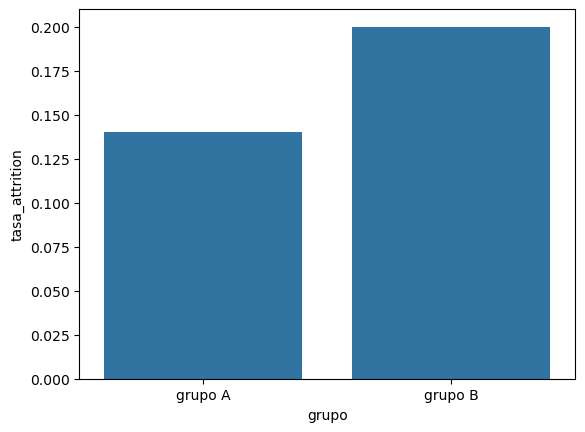

In [ ]:
## Lo pasamos a DFs: *** ver código que da error***
attrition = {"grupo":["grupo A", "grupo B"], "tasa_attrition": [0.14, 0.2]}
df_attrition_unido = pd.DataFrame(attrition)

## Gráfica df_attrition_unido
sns.barplot(x="grupo", y="tasa_attrition", data=df_attrition_unido)
plt.title("Tasa de attrition")

plt.xlabel("Grupos")
plt.ylabel("Tasa de rotacion")

In [74]:
contingency_table = pd.crosstab(df_attrition_unido["grupo"], df_attrition_unido['tasa_attrition'])

# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(p_value)

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia significativa en la tasa de rotación de ambos grupos.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que si que existe una diferencia entre los grupos 
          """)
else:
    print("No hay evidencia de una diferencia significativa en la tasa de rotación de ambos grupos.")
    print("\n ---------- \n")
    print(""" 
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas
          """)

1.0
No hay evidencia de una diferencia significativa en la tasa de rotación de ambos grupos.

 ---------- 

 
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas
          


El tamaño del efecto (d de Cohen) entre Grupo A y Grupo B es: nan


## Exploración general: 

/tmp/ipykernel_25855/2605322453.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="grupo", y="valores", data=abandono_grupo_a, palette="mako");


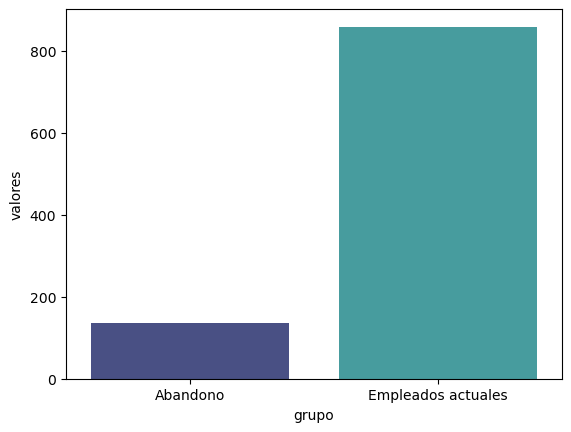

In [ ]:
sns.barplot(x="grupo", y="valores", data=abandono_grupo_a, palette="mako");

In [ ]:
## Chequeamos tasa de abandono en relación al género (empleados satisfechos)

<Axes: xlabel='gender', ylabel='Count'>

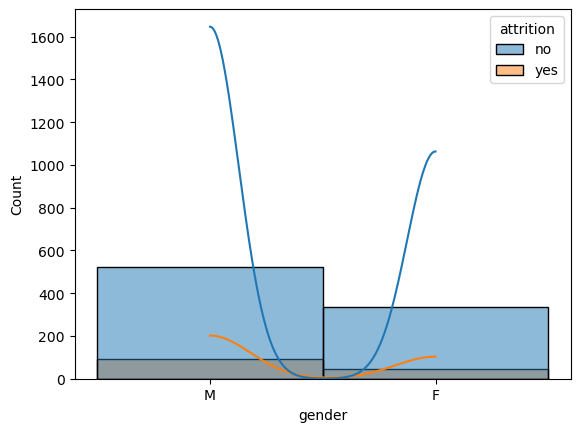

In [ ]:
sns.histplot(data = grupo_a, x = "gender", hue = "attrition", kde = True, color= "blue")
# plt.title("Género según rotación")
# plt.xlabel("Género")
# plt.ylabel("Frecuencia")

In [ ]:
pd.crosstab(grupo_a["attrition"], grupo_a["gender"], normalize="columns")*100 ## porcentaje de abandono por género

gender,F,M
attrition,,
no,87.989556,85.294118
yes,12.010444,14.705882


In [ ]:
## Función para ver si los datos son normales: 

def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.
    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.
    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """
    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [ ]:
normalidad(grupo_a, 'age')

Para la columna age los datos no siguen una distribución normal.


<Axes: xlabel='salary', ylabel='attrition'>

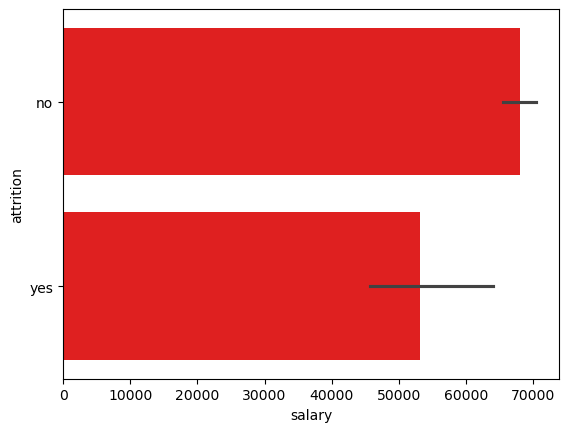

In [ ]:
sns.barplot(data = df, x = "salary", y="attrition", color= "red")

In [ ]:
normalidad(df,"salary")

Para la columna salary los datos no siguen una distribución normal.


In [ ]:
mannwhitneyu()